# Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load Dataset

In [2]:
from sklearn import datasets
iris_dataset = datasets.load_iris() # Load dataset

# define data
data = iris_dataset.data
target = iris_dataset.target # Target is not used for training here; it is used to compare the results!
feature_names = iris_dataset.feature_names

In [3]:
print(feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


# Data Analysis

In [4]:
df = pd.DataFrame(data, columns = feature_names)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>]], dtype=object)

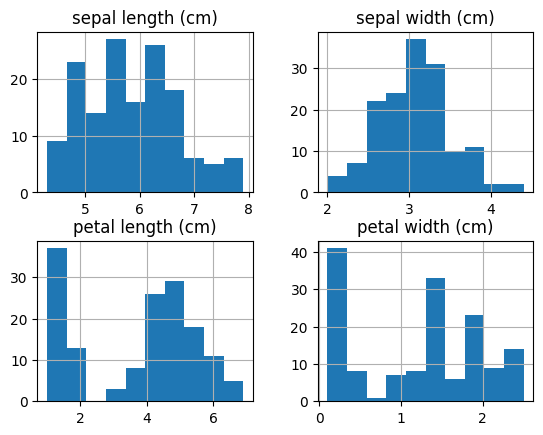

In [7]:
df.hist()

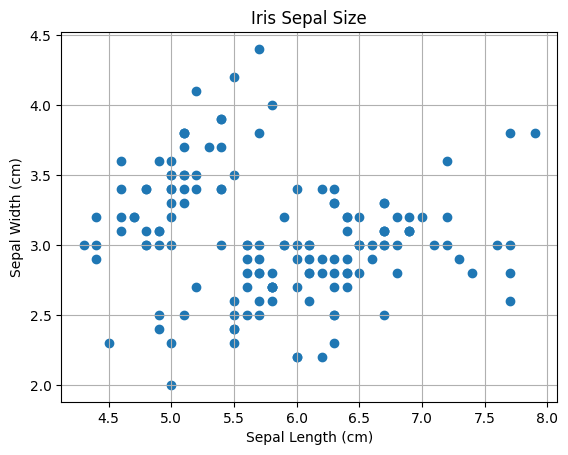

In [9]:
# Visualize two dimensions (first two columns)
plt.scatter(data[:,0], data[:, 1])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Sepal Size')
plt.grid()

# Data Scaling and Preprocessing

In [10]:
from sklearn.preprocessing import StandardScaler # MinMaxScaler()
my_scaler = StandardScaler()
my_scaler.fit(data)
X = my_scaler.transform(data)

# KMeans

# Elbow Method: To determine number of clusters

In [12]:
from sklearn.cluster import KMeans 

inertias = []
K = range(1, 11)

for k in K:
  kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
  kmeans.fit(X)
  inertias.append(kmeans.inertia_)

In [14]:
display(inertias)

[600.0000000000001,
 222.36170496502308,
 139.8204963597498,
 114.09254690403088,
 90.80759161913359,
 80.02249599557439,
 71.61256504701676,
 62.86610173129559,
 55.51713748041519,
 47.26371568868685]

Text(0.5, 1.0, 'Elbow Method for Iris Dataset')

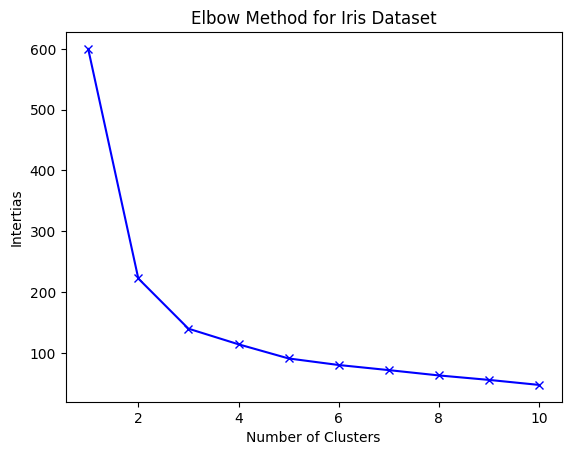

In [15]:
# Examine inertias to determine appropriate number of clusters
plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Intertias')
plt.title('Elbow Method for Iris Dataset')

# KMeans with 3 Clusters

In [16]:
my_kmean = KMeans(n_clusters=3, n_init=10, random_state=0)

In [17]:
my_kmean.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=0)

In [18]:
predictions = my_kmean.labels_ # These are the ML results

In [19]:
print(predictions)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


# Result Visualization

Text(0.5, 1.0, 'Predicted Clusters')

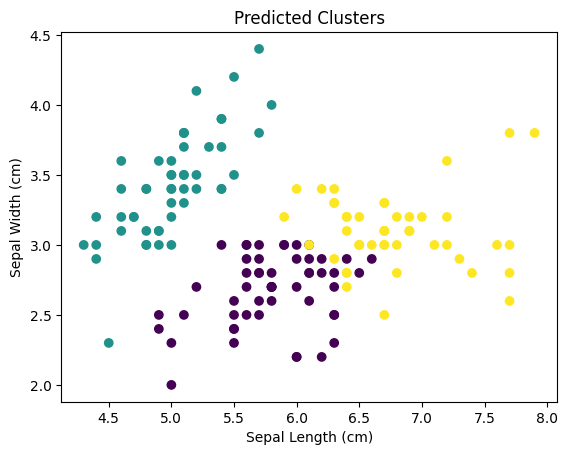

In [20]:
# Plot Predicted Clusters
plt.scatter(data[:,0] , data[:,1], c = predictions)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Predicted Clusters')

# Perform prediction on a new flower

In [21]:
new_flower = np.array([6.6, 3.1, 1.4, 0.7]) # Sepal length, sepal width, petal length, petal width all in "cm"
new_flower = new_flower.reshape( 1, -1)
print(new_flower.shape)


(1, 4)


In [22]:
# standardize new data
new_flower =  my_scaler.transform(new_flower)

In [23]:
print(new_flower)

[[ 0.91683689  0.09821729 -1.34022653 -0.65728337]]


In [24]:
# Do preditction using KMeans
new_prediction = my_kmean.predict(new_flower)
print(new_prediction)

[1]


# Notes on Machine Learning Steps

### Step 1: Obtain data.

### Step 2: Data Analysis (Pandas)

### Step 3: Preprocessing - StandardScaler / Normalization. (VERY IMPORTANT)

### Step 4: Machine Learning (KMeans, NN, Linear Regression ..)
* Training on data using model.fit(X)
* Scale new data using scaler.transform(X_new)
* Predict new predictions using model.predict(X_new_scaled)